In [6]:
# clearing lib cache during development to force-update imports
import sys, importlib
importlib.reload(sys.modules['Logical'])

from Logical import LogicalCircuit

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

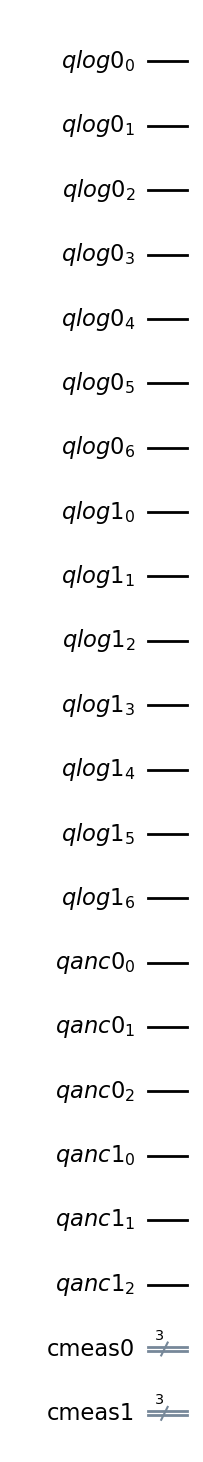

In [71]:
# create LogicalCircuit to store logical qubits
stabilizer_tableau = [
  "XXXXIII",
  "IXXIIXX",
  "XIXIXIX",
  "ZZZZIII",
  "IZZIIZZ",
  "ZIZIZIZ",
]

lqcirc = LogicalCircuit(2, stabilizer_tableau, name="SteaneCodeCircuit")
lqcirc.draw("mpl")

# q = [QuantumRegister(7, name=f"q{i}") for i in range(3)]
# c = [ClassicalRegister(3) for i in range(3)]
# tri = QuantumCircuit(*q, *c)
# tri.draw("mpl")

In [72]:
# Logical state preparation
lqcirc.encode(0, max_iterations=3)
lqcirc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=20, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'qlog0'), 0), Qubit(QuantumRegister(7, 'qlog0'), 1), Qubit(QuantumRegister(7, 'qlog0'), 2), Qubit(QuantumRegister(7, 'qlog0'), 3), Qubit(QuantumRegister(7, 'qlog0'), 4), Qubit(QuantumRegister(7, 'qlog0'), 5), Qubit(QuantumRegister(7, 'qlog0'), 6), Qubit(QuantumRegister(7, 'qlog1'), 0), Qubit(QuantumRegister(7, 'qlog1'), 1), Qubit(QuantumRegister(7, 'qlog1'), 2), Qubit(QuantumRegister(7, 'qlog1'), 3), Qubit(QuantumRegister(7, 'qlog1'), 4), Qubit(QuantumRegister(7, 'qlog1'), 5), Qubit(QuantumRegister(7, 'qlog1'), 6), Qubit(QuantumRegister(3, 'qanc0'), 0), Qubit(QuantumRegister(3, 'qanc0'), 1), Qubit(QuantumRegister(3, 'qanc0'), 2), Qubit(QuantumRegister(3, 'qanc1'), 0), Qubit(QuantumRegister(3, 'qanc1'), 1), Qubit(QuantumRegister(3, 'qanc1'), 2)), clbits=())

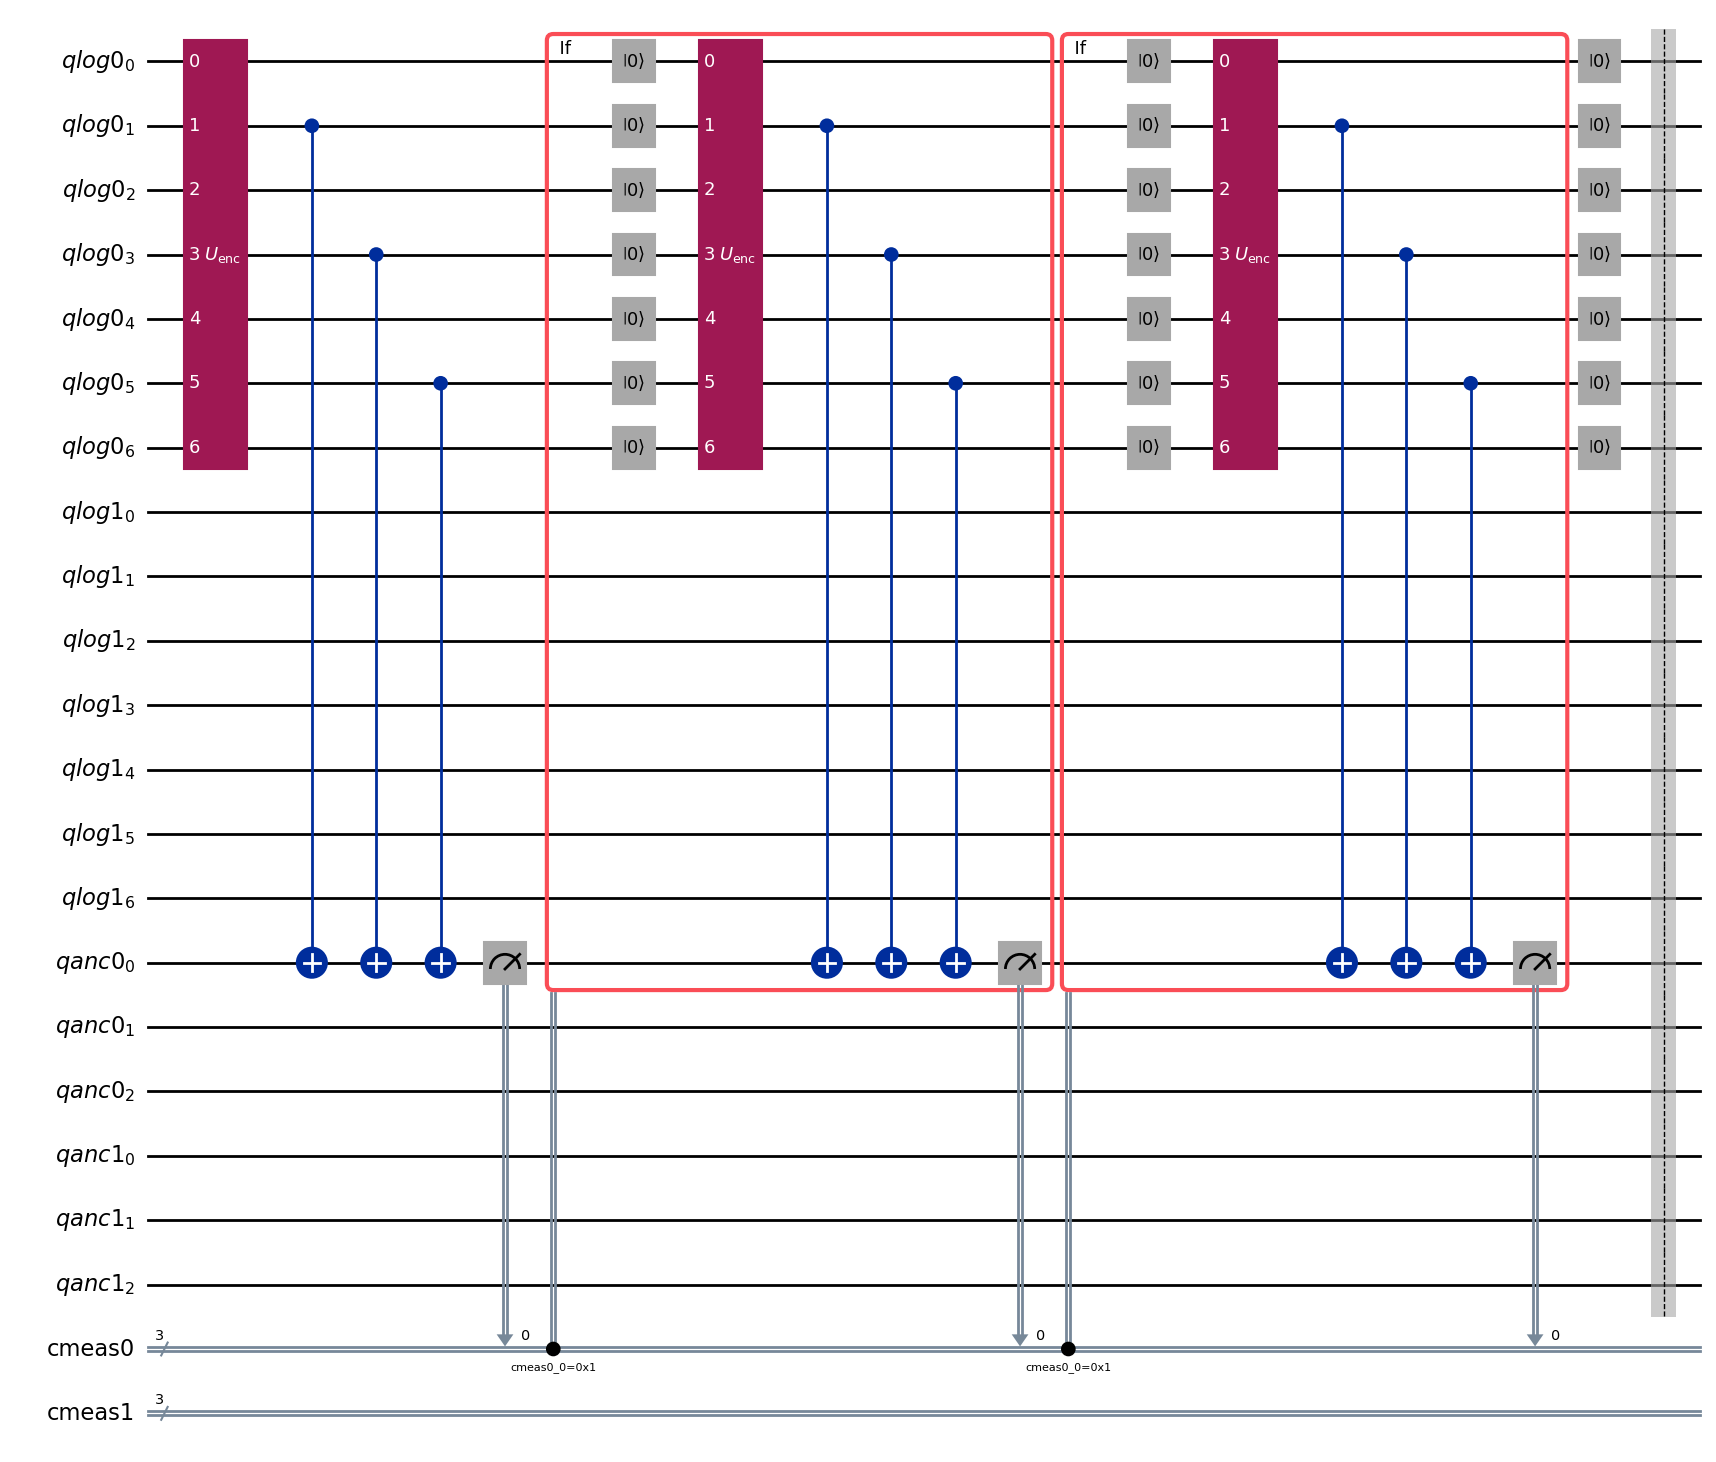

In [73]:
lqcirc.draw("mpl")

In [74]:
# Option 1: Automatic QEC cycling
lqcirc.configure_qec_cycle(sample_rate=["Depth", 5])
# <insert algorithm code>

# Option 2: Manually trigger QEC cycles
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
# ...

In [75]:
# measure all qubits
lqcirc.measure_all()

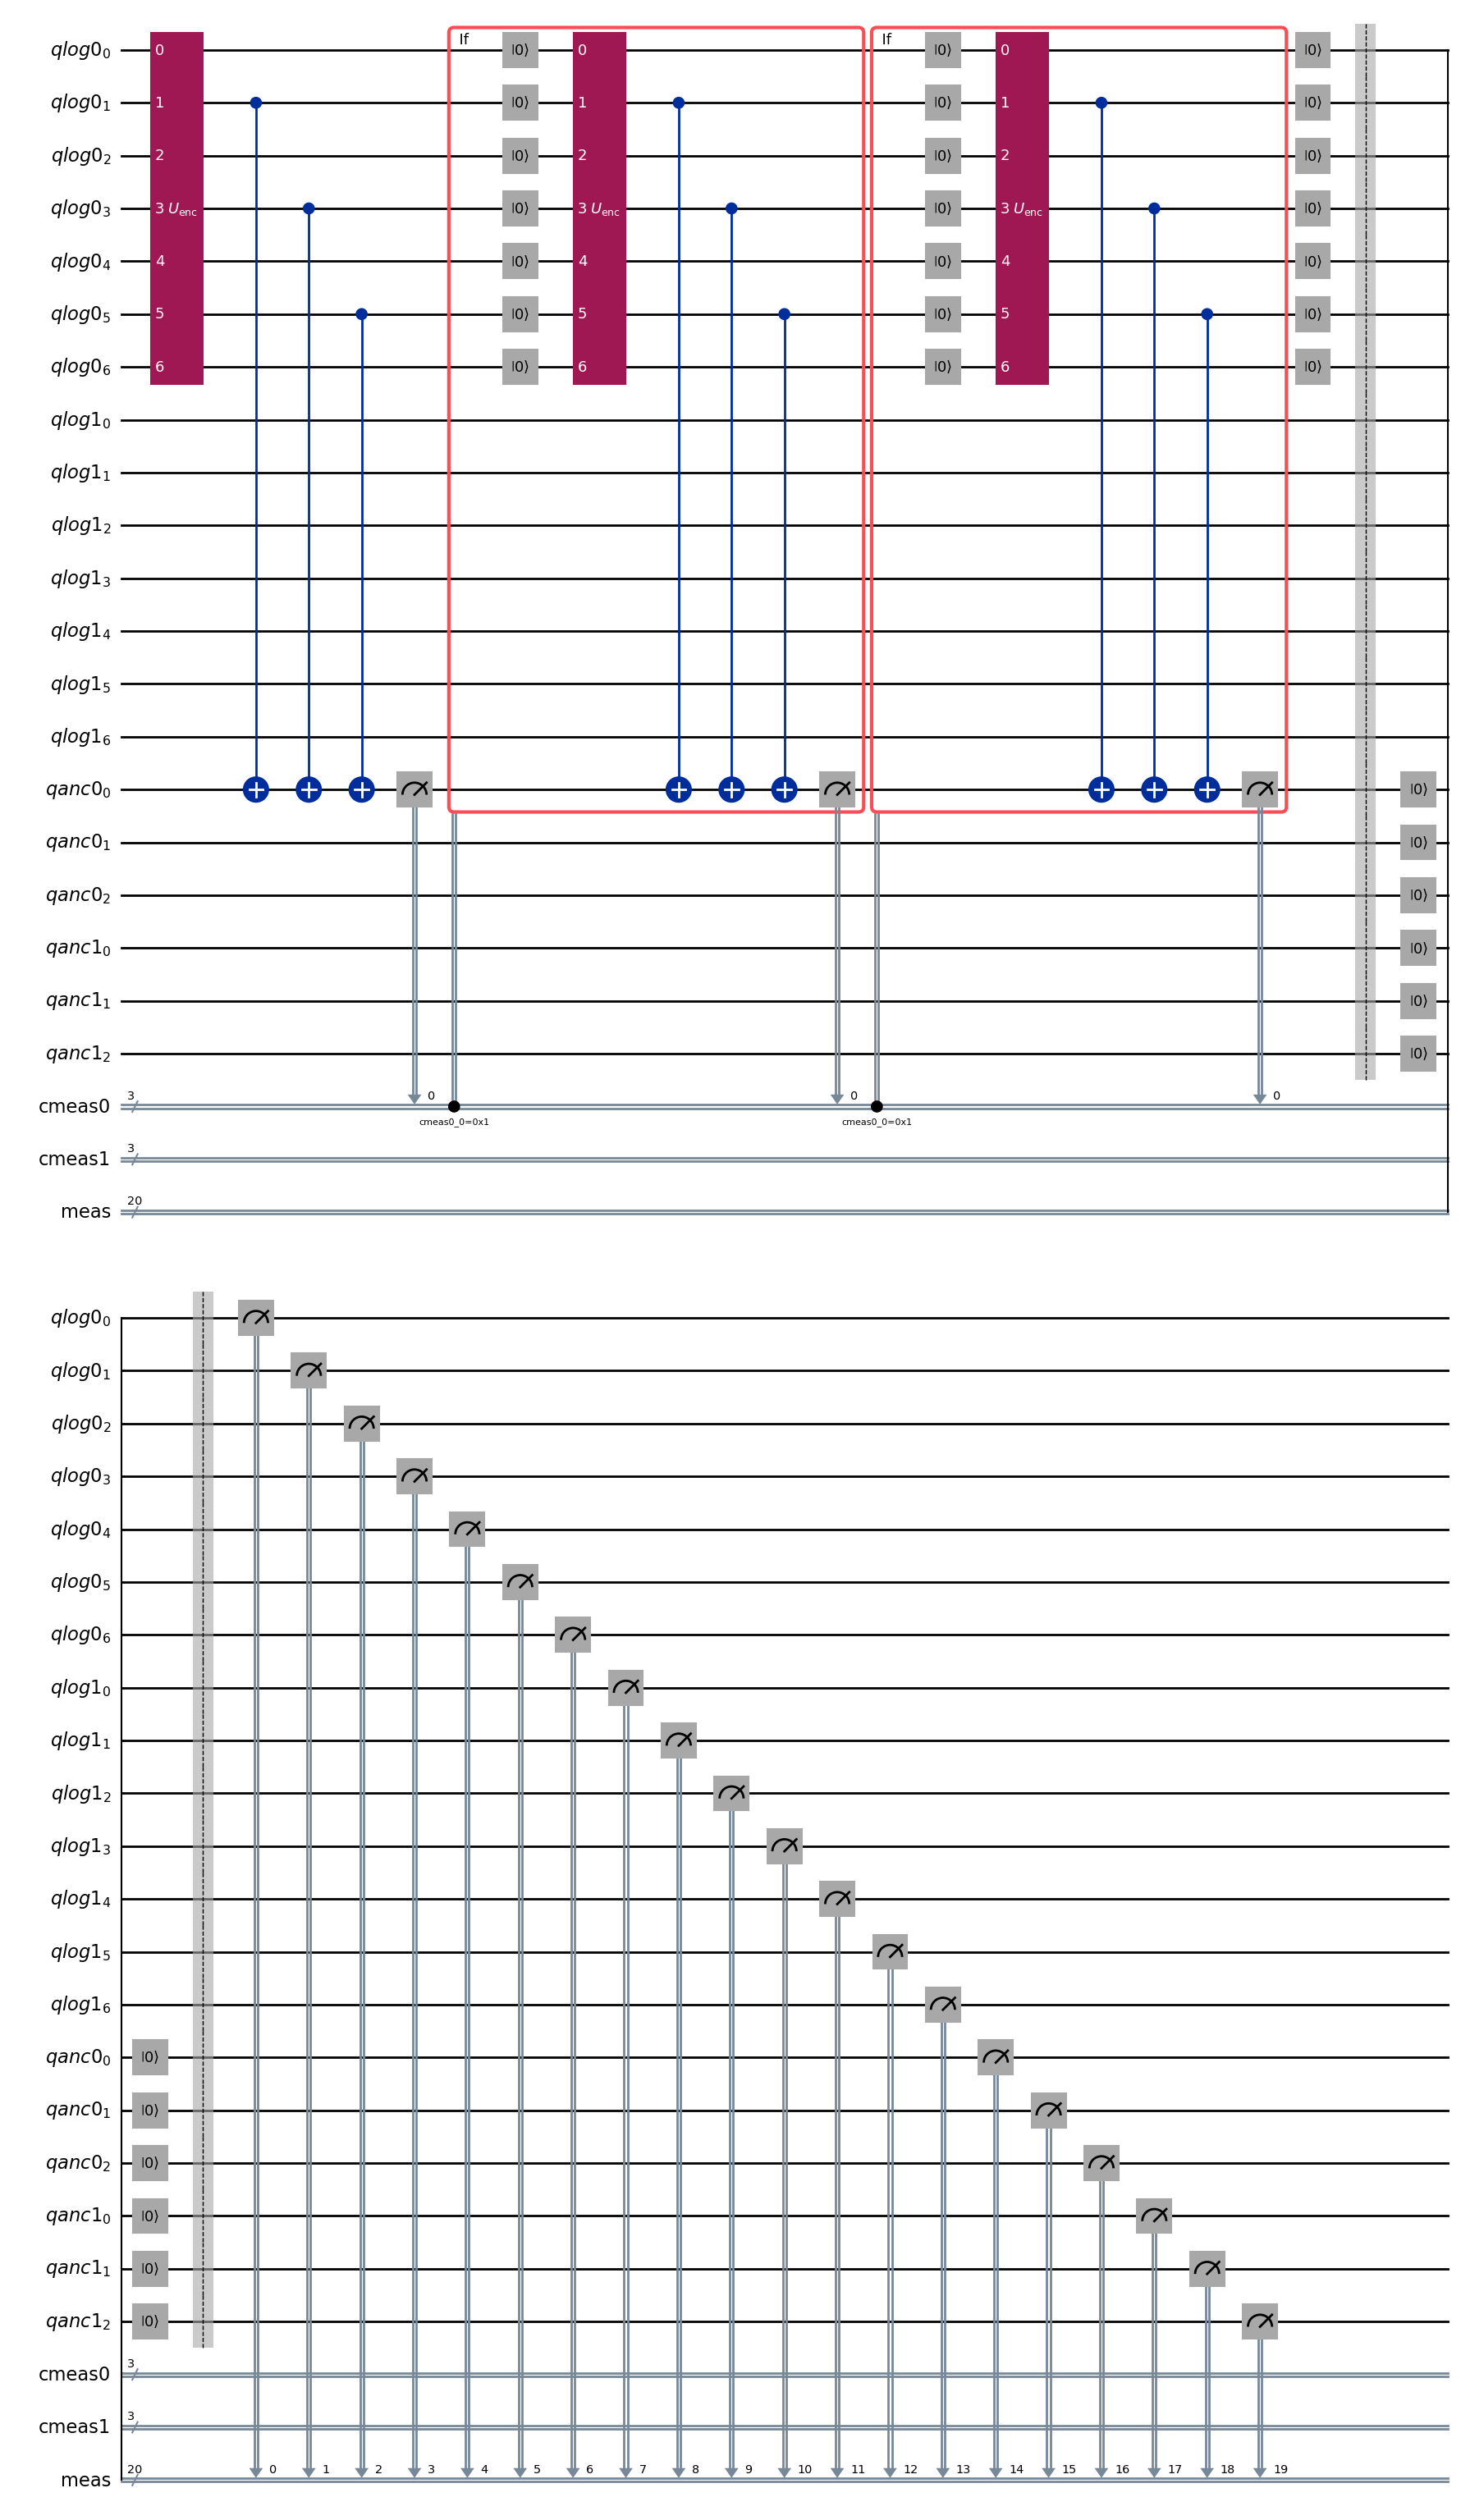

In [76]:
lqcirc.draw("mpl")

In [84]:
import itertools

# transpile circuit with no optimization to preserve RB circuit
noisy_sim = AerSimulator(method="density_matrix")

fully_coupled_map = itertools.product(range(lqcirc.num_qubits), range(lqcirc.num_qubits))
fully_coupled_map = [list(pair) for pair in fully_coupled_map]

noisy_circuit_transpiled = transpile(lqcirc, noisy_sim, coupling_map=fully_coupled_map, optimization_level=0)

result = noisy_sim.run(noisy_circuit_transpiled).result()
print(result)
print(f"Simulation status: '{result.status}'")
print(f"Memory requirement: {result.results[0].metadata['required_memory_mb']} MB")

counts = result.get_counts(noisy_circuit_transpiled)

Result(backend_name='aer_simulator_density_matrix', backend_version='0.15.1', qobj_id='', job_id='90964209-3b9a-4fec-aa0b-7490d6586eb4', success=False, results=[ExperimentResult(shots=0, success=False, meas_level=2, data=ExperimentResultData(), status=ERROR: a circuit requires more memory than max_memory_mb., circ_id=0, seed_simulator=0, metadata={'required_memory_mb': 16777216}, time_taken=0.0)], date=2025-02-07T10:38:24.269304, status=ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb., header=None, metadata={'time_taken_parameter_binding': 3.271e-05, 'time_taken_execute': 4.4365e-05, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 15706, 'parallel_experiments': 1}, time_taken=0.007982254028320312)
Simulation status: 'ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb.'
Memory requirement: 16777216 MB


QiskitError: 'Data for experiment "SteaneCodeCircuit" could not be found.'